<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 2</b>


Thank you for the updates Michael! You can find my new comments with digit 2. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Michael! Congratulations on submitting another project! 🎉 I will be using the standard the color marking:
    

   
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    

    
- Analyzed distributions. It is a very important step that helps us identify outliers and choose the most appropriate data preprocessing steps;    
    
    
- Handled outliers; 
    
    
    
- Excluded irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    

     
- Trained and compared several models, great!

    
- Measured their training and prediction speed.
   

- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance, please check the data for the duplicates after you drop columns. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same; 


    

    
  
There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are just several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

Procedure
- Import data
- Exammine data
- Clean data
- Model data
- Random Forest
- Decision Tree
- Linear Regression
- LightGBM
- CatBoost
- XGBoost
- Compare models
- RMSE & Time

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
Good introduction that reflects the core goals. Well done!  
    
</div>

## Data preparation

In [1]:
# initializing

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import time

from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer


from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb



In [2]:
# These inputs allow me to test sections without commenting out others
do_explore_df = 'Y' # input("Explore the df (Y/N)? ")
do_train_models = 'Y' # input("Perform training of models (Y/N)? ")


In [3]:
# load data

df = pd.read_csv('/datasets/car_data.csv', parse_dates=True)

Function Declaration

In [4]:
# Standardized plotting of a line

def plot_line(df, colx, coly, title):
    sns.lineplot(x=colx, y=coly, data=df)
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.title(title)
    plt.show()

In [5]:
# Standardized plotting of a barplot and histogram

def plot_hist_bar(df, title, col):
    print()
    print(title)
    
    # Plot histograms of the columns
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.histplot(data=df, x=col, bins=30, ax=axes[0], kde=True)
    axes[0].set_title(title)
    
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(title)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [6]:
# Get value counts by column

def get_counts(df, col):

    print()
    print(f'Value  counts of {col}')
    print()
    # Get value counts and convert to a DataFrame
    value_counts_df = df[col].value_counts().reset_index()
    
    # Rename columns for clarity
    value_counts_df.columns = ['value', 'count']
    value_counts_df.sort_values(by='count', ascending=False)
    print(value_counts_df.tail(10))


In [7]:
# Outputs basic exploration of the DF

def explore_df(df):
    print()
    display(df.sample(5))
    print()
    display(df.describe())
    print()
    display(df.info())
    print()
    print(f'Shape: {df.shape}')
    print()
    print(f'Number of duplicates: {df.duplicated().sum()}') 
    print()
    print(f'Number of null entries: {df.isna().sum().sum()}') 


In [8]:
# Perform exploration of DF
# Conditions allow to skip to reduce screen realestate

if do_explore_df == 'Y':
    explore_df(df)
else:
    print('Exploring DF hidden to save space')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
281075,18/03/2016 18:50,1520,sedan,1999,manual,131,focus,150000,11,petrol,ford,NaN,18/03/2016 00:00,0,44628,05/04/2016 22:45
212556,22/03/2016 11:53,1300,sedan,2002,manual,116,3er,150000,5,petrol,bmw,no,22/03/2016 00:00,0,4109,25/03/2016 03:18
315989,31/03/2016 15:50,1499,sedan,1998,manual,88,3_reihe,125000,12,petrol,mazda,NaN,31/03/2016 00:00,0,24116,06/04/2016 08:46
204220,17/03/2016 19:55,999,sedan,1998,manual,60,2_reihe,100000,11,petrol,peugeot,no,17/03/2016 00:00,0,44787,17/03/2016 19:55
86159,19/03/2016 16:42,850,bus,1994,manual,60,transporter,30000,4,gasoline,volkswagen,NaN,19/03/2016 00:00,0,94315,21/03/2016 21:48


,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object

None


Shape: (354369, 16)

Number of duplicates: 262

Number of null entries: 181077


Initial observations:
- Dates are in Day / Month / Year format
- DateCrawled is type object but should be datetime
- DateCreated is type object but should be datetime
- LastSeen is type object but should be datetime
- Registration month starts at 0 and ends at 12
- Registration Year is between 1000 and 9999. The automobile was invented in 1886 and the data was crawled in 2016.
- Number of duplicates: 262
- Number of null entries: 181077
- Number of Pictures is 0 for all entries and can be removed.

In [9]:
# Initialize tracking of data removed
original_size = len(df)
print(f'Original size: {original_size}')
rows_removed = 0

Original size: 354369


NumberOfPictures is 0 in all cases and can be removed.

In [10]:
# NumberOfPictures = 0 in all cases
df = df.drop('NumberOfPictures', axis=1)

262 full duplicates were found. As there are three timestamps included these are clearly duplicate entries and can be removed.

In [11]:
#drop duplicates
df = df.drop_duplicates()
rows_removed = 262 # to track amount of data removed

In [12]:
get_counts(df, 'FuelType')


Value  counts of FuelType

      value   count
0    petrol  216161
1  gasoline   98658
2       lpg    5307
3       cng     565
4    hybrid     233
5     other     204
6  electric      90


Petrol and gasoline are the same. Convert gasoline to petrol to stay consistent. 

In [13]:
# convert gasoline to petrol

df['FuelType'] = df['FuelType'].replace('gasoline', 'petrol')

In [14]:
# Convert 'date_str' column to datetime objects

def convert_dates(df, cols=['DateCrawled', 'DateCreated', 'LastSeen']):
    for col in cols:
        df[col] = pd.to_datetime(df[col])

    df['CreatedYear'] = df['DateCreated'].dt.year
    df['SeenYear'] = df['LastSeen'].dt.year
    return df

df = convert_dates(df) 

In [15]:
print()
print('Latest date crawled:')
print(df['DateCrawled'].max())
print()
print('Latest registration year:')
print(df['RegistrationYear'].max())


Latest date crawled:
2016-12-03 23:59:00

Latest registration year:
9999


Values in RegistrationYear are between between 1000 and 9999. The automobile was invented in 1886 and the data was crawled in 2016.
These outliers will be filtered out.

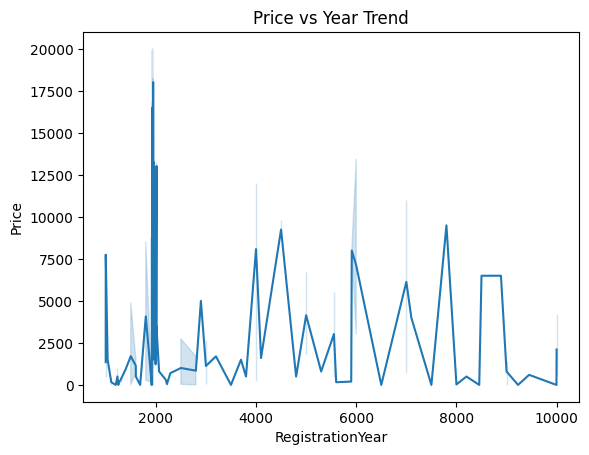


RegistrationYear


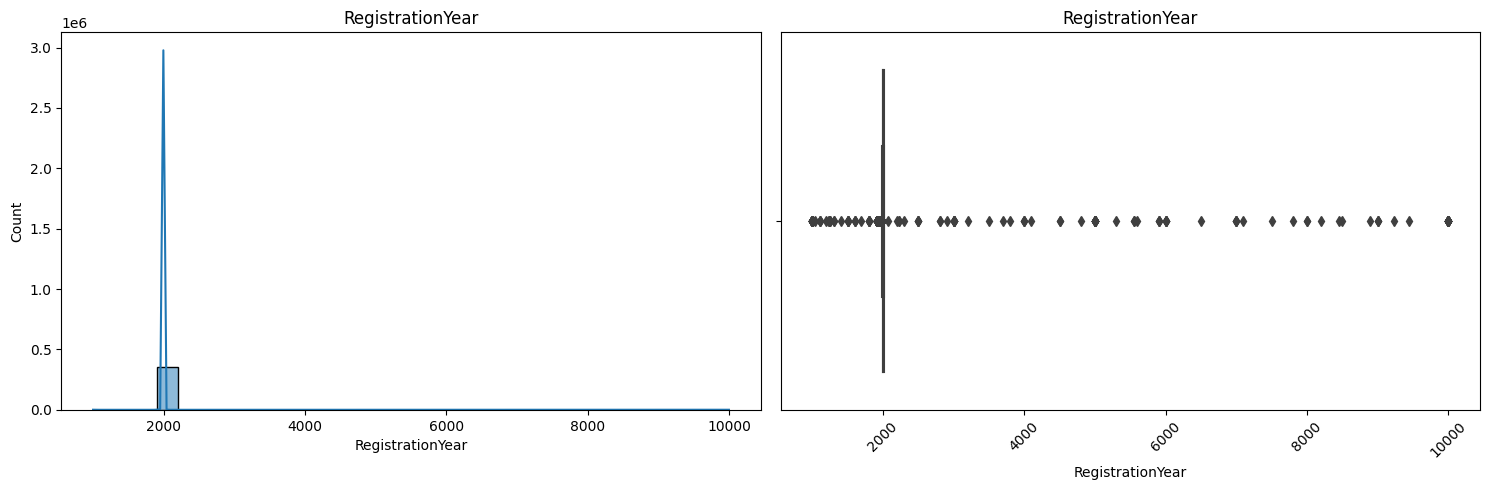

In [16]:
plot_line(df, 'RegistrationYear', 'Price', 'Price vs Year Trend')
plot_hist_bar(df, 'RegistrationYear', 'RegistrationYear')

In [17]:
# filtering registration year outliers 

df_current_size = len(df) # current size of the df
print(f'Size of DF: {df_current_size}')

size_of_outliers = len(df[(df['RegistrationYear'] < 1886)])
print(f'Number of outliers before 1886: {size_of_outliers}')

size_of_outliers = len(df[(df['RegistrationYear'] > 2016)])
print(f'Number of outliers after 2016: {size_of_outliers}')

size_of_outliers = len(df[(df['RegistrationYear'] < 1886)]) + len(df[(df['RegistrationYear'] > 2016)])
print(f'Number of rows removed: {size_of_outliers} or {(size_of_outliers)/df_current_size*100:.2f}%')

# Drop registration years that don't make sense
df = df[(df['RegistrationYear'] >= 1886) & (df['RegistrationYear'] <= 2016)] 

rows_removed += size_of_outliers


Size of DF: 354107
Number of outliers before 1886: 66
Number of outliers after 2016: 14529
Number of rows removed: 14595 or 4.12%


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Good! 

</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :) 


</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
It's great that you analyze distributions! Why is this important? In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue.    
</div>

The histogram shows a significant amount of outliers exist before 1986. These will be removed.

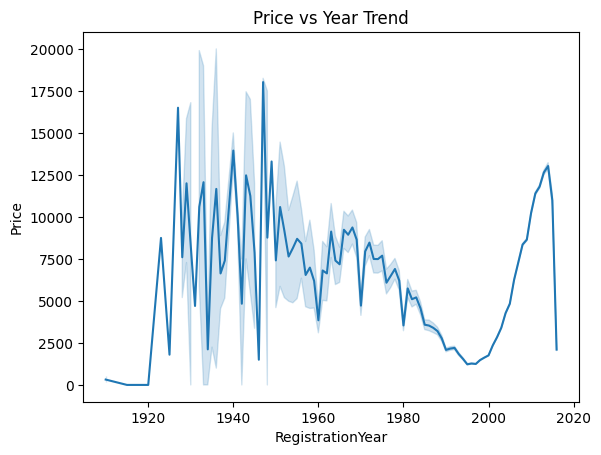


RegistrationYear


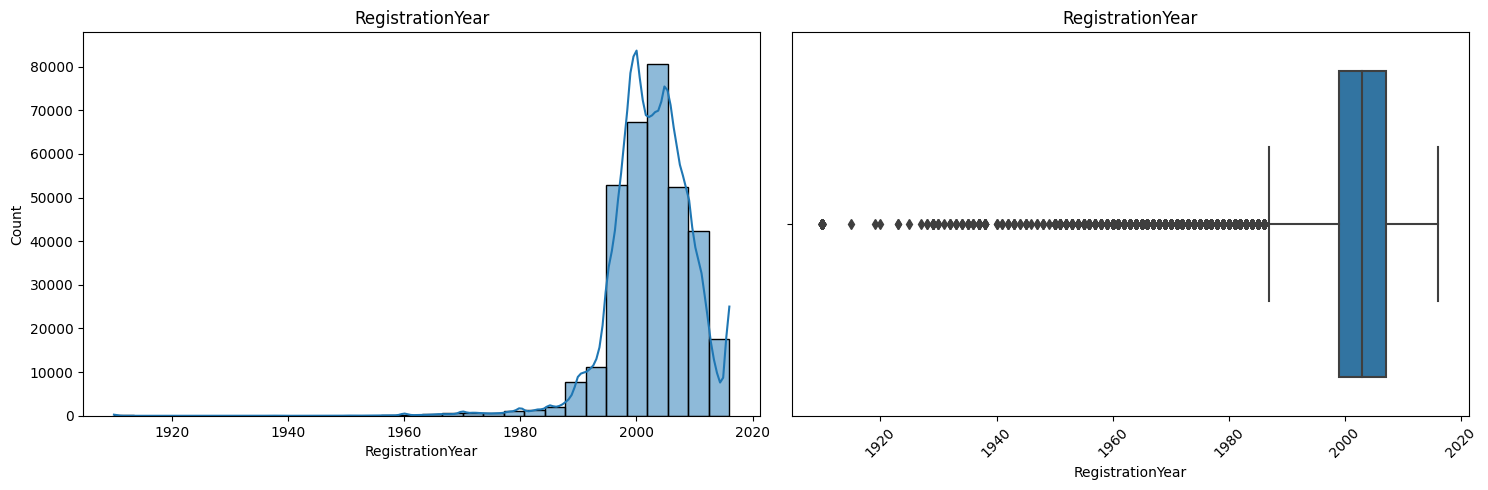

In [18]:
plot_line(df, 'RegistrationYear', 'Price', 'Price vs Year Trend')
plot_hist_bar(df, 'RegistrationYear', 'RegistrationYear')

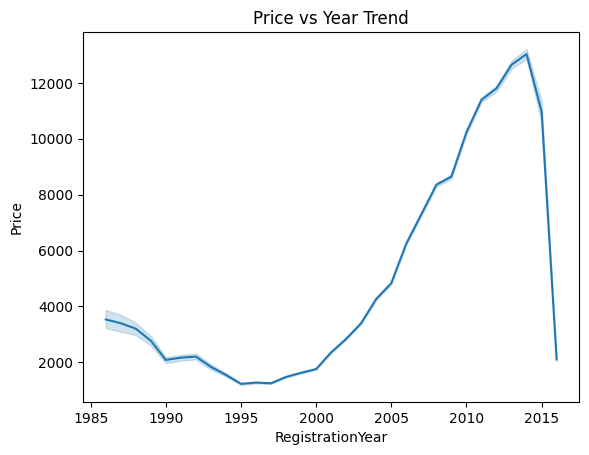


RegistrationYear


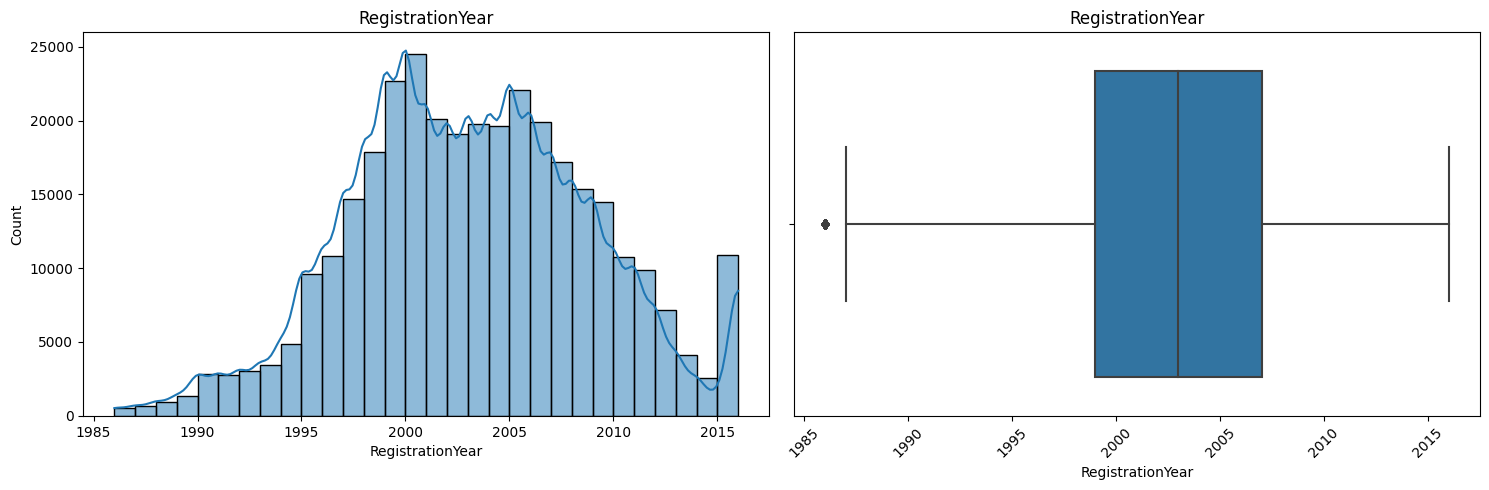

In [19]:
# Removing additional outliers in Registration Year:
rows_removed += size_of_outliers
df = df[(df['RegistrationYear'] >= 1986)]

plot_line(df, 'RegistrationYear', 'Price', 'Price vs Year Trend')
plot_hist_bar(df, 'RegistrationYear', 'RegistrationYear')


Price


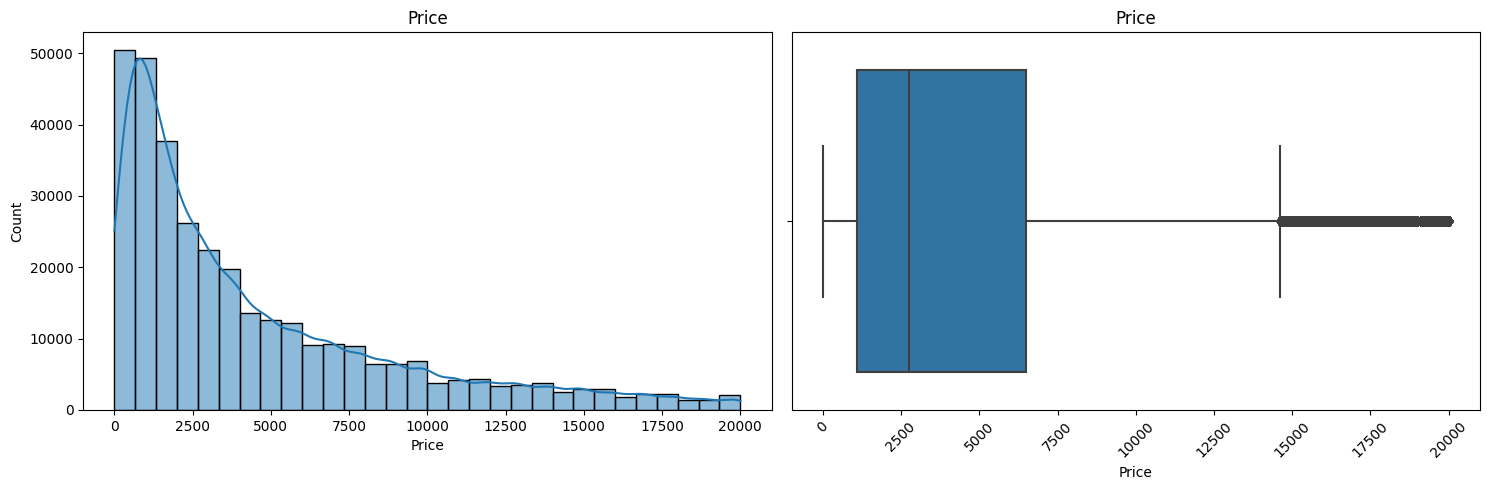

In [20]:
plot_hist_bar(df, 'Price', 'Price')

In [21]:
print(df['Price'].describe())

count    333378.000000
mean       4447.926354
std        4528.924380
min           0.000000
25%        1099.000000
50%        2750.000000
75%        6499.000000
max       20000.000000
Name: Price, dtype: float64


In [22]:
print(f"The number of sales where Price is 0: {(df['Price']==0).sum()} or {(df['Price']==0).sum()/len(df)*100:.2f}%")
print()
print(f"The number of sales where Price is less than 100: {(df['Price']<100).sum()} or {(df['Price']<100).sum()/len(df)*100:.2f}%")

The number of sales where Price is 0: 9473 or 2.84%

The number of sales where Price is less than 100: 11765 or 3.53%


9473 entries exist where the price is 0 and 11765 where the price is less than 100. As price is the target of the model, including unnaturally low prices will reduce the model accuracy. This represents 3.5% of datapoints. The higher end of outliers appears to be reasonable for a used car.

In [23]:
# dropping instances when the price is less than 100
rows_removed += (df['Price']<100).sum()
df = df[(df['Price'] > 99) ]

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
    
You can also analyze its max value. 

</div>

Looking for outliers in Power:


Power


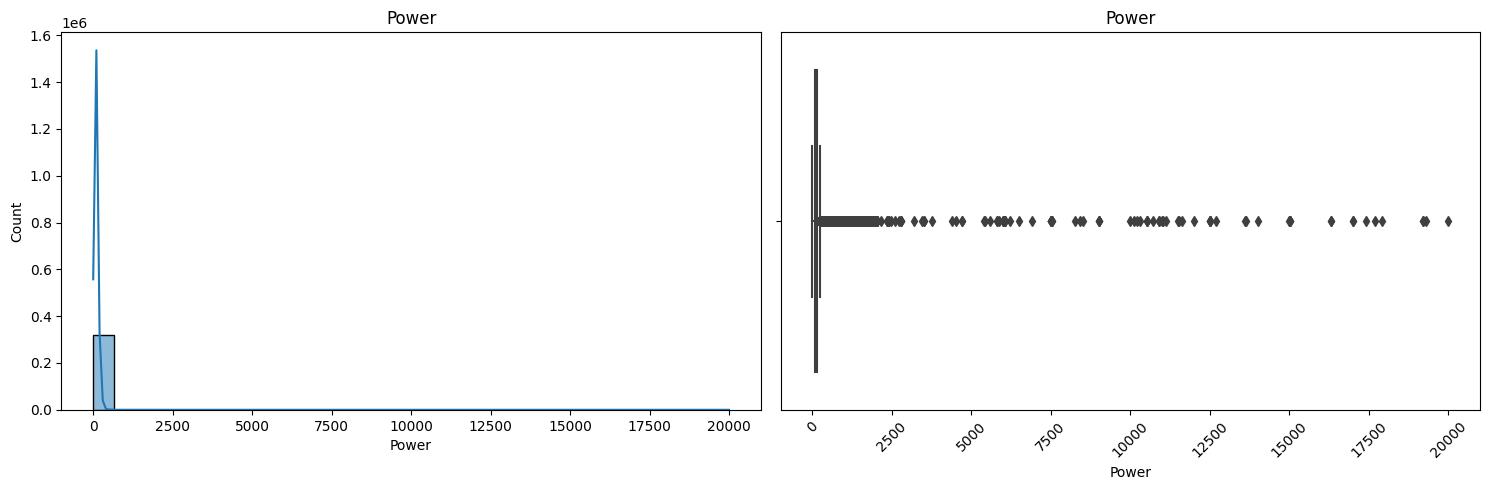

In [24]:
plot_hist_bar(df, 'Power','Power')

In [25]:
# dropping instances when the power is less than 100
print(f"Listings with cars over 1000 HP: {(df['Power']>1000).sum()} or {(df['Power']>1000).sum()/len(df)*100:.2f}%")
print(f"Listings with cars over 500 HP: {(df['Power']>500).sum()} or {(df['Power']>500).sum()/len(df)*100:.2f}%")
print(f"Listings with cars under 50 HP: {(df['Power']<50).sum()} or {(df['Power']<50).sum()/len(df)*100:.2f}%")
print(f"Listings with cars with 0 HP: {(df['Power']==0).sum()} or {(df['Power']==0).sum()/len(df)*100:.2f}%")



Listings with cars over 1000 HP: 256 or 0.08%
Listings with cars over 500 HP: 381 or 0.12%
Listings with cars under 50 HP: 34903 or 10.85%
Listings with cars with 0 HP: 30235 or 9.40%


- Cars over 500 HP fall into the exotic category and are not represented in the brand. These can be safely removed as outliers.
- While the minimum HP for a new car is around 50 HP and no functioning car has 0 HP, these values will be kept as they may represent cars sold for parts.


Power


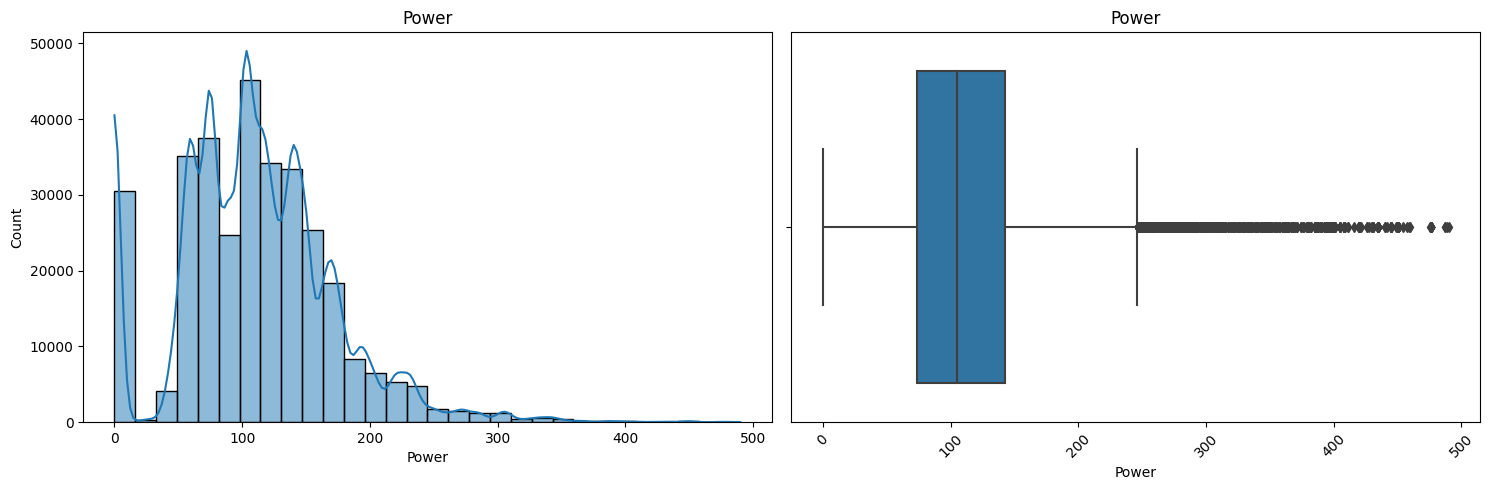

In [26]:
# Drop HP over 499
rows_removed += (df['Power']>499).sum()
df = df[(df['Power'] < 500) ]

plot_hist_bar(df, 'Power', 'Power')

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Agreed! 

</div>

Looking for outliers in Mileage


Mileage


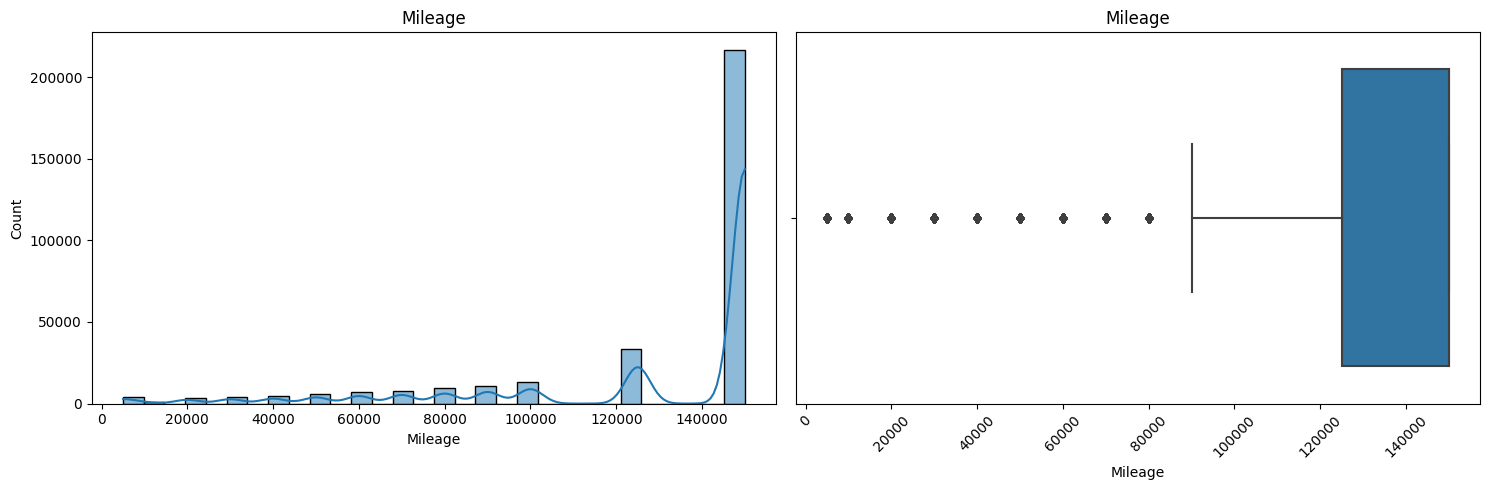

In [27]:
plot_hist_bar(df, 'Mileage','Mileage')

Mileage appears to be reasonablle

In [28]:
print()
print('Missing values by column: ')
print(df.isna().sum())
print(f'Total number of missing values: {df.isna().sum().sum()}')
print()


Missing values by column: 
DateCrawled              0
Price                    0
VehicleType          18238
RegistrationYear         0
Gearbox              13733
Power                    0
Model                14078
Mileage                  0
RegistrationMonth        0
FuelType             22119
Brand                    0
NotRepaired          56671
DateCreated              0
PostalCode               0
LastSeen                 0
CreatedYear              0
SeenYear                 0
dtype: int64
Total number of missing values: 124839



In [29]:
# A function to remove categorical outliers by a group column, like brand or model:

def remove_categorical_outliers(df, group_column, categorical_column, threshold):

    value_counts = df.groupby(group_column)[categorical_column].value_counts()
    filtered_df = df[df.set_index([group_column, categorical_column]).index.isin(value_counts[value_counts >= threshold].index)]
    return filtered_df


In [30]:
def remove_outliers_by_group(df, group_col, value_col):

    def filter_outliers(group):
        q1 = group[value_col].quantile(0.25)
        q3 = group[value_col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return group[(group[value_col] >= lower_bound) & (group[value_col] <= upper_bound)]

    filtered_df = df.groupby(group_col).apply(filter_outliers).reset_index(drop=True)
    return filtered_df


- Outliers will be removed from categorical columns - instances only one type of a model appears.
- Numerical outliers - in price and power - will also be removed by model.

In [31]:
# Removing categorical outliers by model

threshold = 2
df = remove_categorical_outliers(df, 'Model', 'FuelType', threshold)
df = remove_categorical_outliers(df, 'Model', 'Gearbox', threshold)
df = remove_categorical_outliers(df, 'Model', 'VehicleType', threshold)
df = remove_outliers_by_group(df, 'Model', 'Price')
df = remove_outliers_by_group(df, 'Model', 'Power')

In [32]:
print()
print('Missing values by column: ')
print(df.isna().sum())
print(f'Total number of missing values: {df.isna().sum().sum()}')
print()


Missing values by column: 
DateCrawled              0
Price                    0
VehicleType              0
RegistrationYear         0
Gearbox                  0
Power                    0
Model                    0
Mileage                  0
RegistrationMonth        0
FuelType                 0
Brand                    0
NotRepaired          28374
DateCreated              0
PostalCode               0
LastSeen                 0
CreatedYear              0
SeenYear                 0
dtype: int64
Total number of missing values: 28374



After removing categorical outliers, instances where only one version of a model appeared, the missing values have also been removed.

In [33]:
print(f"Number of rows where Brand is other: {(df['Brand']=='sonstige_autos').sum()}")
#df = df[~df['Brand'].isin(['sonstige_autos'])]


Number of rows where Brand is other: 0


In [34]:
print(f"Number of rows where Vehicle Type and Model are both missing: {(df['VehicleType'].isnull() & df['Model'].isnull()).sum()}") 
df = df.dropna(subset=['VehicleType', 'Model'], how='all')


Number of rows where Vehicle Type and Model are both missing: 0


In [35]:
# dropping rows where model is unknown - this contains the most information about the vehicle
print()
print(f"Number of rows where Model is missing: {df['Model'].isna().sum()}")
df = df.dropna(subset=['Model'], how='all')

# dropping rows where model is 'other'
print(f"Number of rows where Model is other: {(df['Model']=='other').sum()}")
df = df[~df['Model'].isin(['other'])]



Number of rows where Model is missing: 0
Number of rows where Model is other: 16671


In [36]:
print(df['VehicleType'].value_counts(dropna=False))


sedan          66177
small          53345
wagon          49408
bus            19649
convertible    14153
coupe           9512
suv             7174
other           1377
Name: VehicleType, dtype: int64


In [37]:
# print(sorted(df['Brand'].unique()))

In [38]:
print()
print('Missing values by column: ')
print(df.isna().sum())
print(f'Total number of missing values: {df.isna().sum().sum()}')
print()


Missing values by column: 
DateCrawled              0
Price                    0
VehicleType              0
RegistrationYear         0
Gearbox                  0
Power                    0
Model                    0
Mileage                  0
RegistrationMonth        0
FuelType                 0
Brand                    0
NotRepaired          26321
DateCreated              0
PostalCode               0
LastSeen                 0
CreatedYear              0
SeenYear                 0
dtype: int64
Total number of missing values: 26321



In [39]:

# a function to cycle through each brand and perform tasks
def cycle_brand(df, full):

    # Get a list of each unique brand
    brands = sorted(df['Brand'].unique())
    
    # Cycle through each brand
    if full==True:
        for brand in brands:
            plot_hist_bar(df[df['Brand']==brand], brand, 'Price')
    else:
        brand = 'volkswagen'
        plot_hist_bar(df[df['Brand']==brand], brand, 'Price')

#cycle_brand(df, False) # To iterate through all brands pass True


In [40]:
def cycle_model(df, full):

    if full == True:
        models = sorted(df['Model'].unique()) #get each unique model
    
        for model in models:
            plot_hist_bar(df[df['Model']==model], model, 'Price')
    else:
        # Otherwise only show an example using the most common model
        model = 'golf'
        plot_hist_bar(df[df['Model']==model], model, 'Price')

#cycle_model(df, False)

In [41]:

get_counts(df, 'Model')


Value  counts of Model

                  value  count
235                  gl     10
236                 200     10
237               kappa      9
238              amarok      9
239                  q3      8
240          elefantino      4
241                  i3      3
242              samara      3
243              kalina      3
244  range_rover_evoque      2


In [42]:
# Drop models with poor representation:

threshold = 5
df = remove_categorical_outliers(df, 'Brand', 'Model', threshold)


Outliers in brands and models have been identified. The outliers have not been removed as there may be many factors impacting price in a used car. Some features, like the model in the example above, have poor representation which may cause discrepencies. At this time no changes will be made.

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    

    
Are there any outliers other in the data?  Hint: the `power` column definitely has outliers.
</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
<b> Response </b>
Thank you. Adjustments have been made to remove overall outliers as well as outliers based on brand and model.
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Very good :) 
</div>

In [43]:
# Filling remaining missing values with other to be consistent with branding.
df.fillna('other', inplace=True)

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Do you need to write a function here? You can apply `fillna` to the whole dataframe. 

</div>

In [44]:
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 0


In [45]:
# Drop uneccessary columns
drop_cols = ['DateCrawled',  'DateCreated', 'LastSeen'] #, 'RegistrationMonth', 'PostalCode'] #, 'Brand'] #'RegistrationYear', 'PostalCode' removed

for col in drop_cols:
    df=df.drop(col, axis=1)


In [46]:
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 15099


In [47]:
# This just removes the duplicates but keeps the first instance
df = df.drop_duplicates(keep='first')
#print(f"Removed {len(df) - len(df_cleaned)} duplicate rows")

In [48]:
print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 0


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Agreed! We don't need these columns. 
    
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
- `DateCreated`, however, can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.


    

- Another option is to drop `VehicleType` and `Brand`, since we have `Model` that should reflect both. 

</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
   
After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
   
</div>
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
    
    
Consider analyzing categories as well. Petrol and gasoline refer to the same fuel, so we can use one of these categories. There are also some rare model categories that can be dropped. If a category appears only in the training or validation subset, for instance, and we use `handle_unknown='ignore'`, the linear model might miss important signals in validation or make predictions with incomplete features thus breaking the assumptions of linearity. It may be helpful to make sure that training and validation subsets use the same feature columns after encoding. 
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Excellent! 
</div>

## Summary:
- The data has been imported and examined.
- 262 full duplicates were identified and removed.
- 181077 empty datapoints filled.
- NumberOfPictures is 0 for all cases and has been dropped
- RegistrationMonth contains 13 months, this column was dropped.
- Registration Year includes dates between 1000 and 9999. Values below 1986 and above 2016 were removed as outliers.
- 9473 entries exist where the price is 0 and 11765 where the price is less than 100. As price is the target of the model, including unnaturally low prices will reduce the model accuracy. This represents 3.5% of datapoints.
- 3210 rows have been removed where the vehicle type and model were both not included. 
- Fuel Types have been updated so that gasoline has been replaced with petrol.
- Outliers in brands and models have been identified and removed

In total 35966 rows have been removed or 10% of the original dataset.

There may be room to improve by examing alternative ways of filling missing data.

Implementing changes to data collection to ensure standardization is recommended.

## Model training

- A dataframe will be created to track results of the models.
- Dictionaries will be created to itterate through the models and reduce code.

In [49]:
# Create a results dataframe
# This is used to track and compare results

results_df = pd.DataFrame(columns=['Model', 'Total_Time', 'Training_Time', 'Prediction_Time', 'RMSE'])


In [50]:
# Create a models dictionary
# These are used to iterate through the models

models_encoded = {}
models_not_encoded = {}


In [51]:
def get_col_transform(features_train, features_valid, features_test):
    
    # Define which columns are categorical
    categorical_features = ['VehicleType', 'Gearbox', 'Model', 'NotRepaired', 'FuelType', 'Brand']
    
    # Create a ColumnTransformer with OneHotEncoder for categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'  # This keeps the remaining columns untouched
    )
    
    # Fit the preprocessor on the training set and transform the splits
    features_train = preprocessor.fit_transform(features_train)
    features_valid = preprocessor.transform(features_valid)
    #features_test = preprocessor.transform(features_test)

    return features_train, features_valid, features_test


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Good! 
</div>

In [52]:
# A function to perform the train_test_split function for both encoded and not encoded models.

def get_train_test(df):
    #features_train, features_valid, target_train, target_valid = train_test_split(
    #df.drop('Price', axis=1), df.Price, test_size=0.25, random_state=42)

    df_train_valid, df_test = train_test_split(df, test_size=0.2, random_state=42)
    df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=42)
    
    # Features and targets for each dataset
    features_train = df_train.drop(['Price'], axis=1)
    target_train = df_train['Price']
    
    features_valid = df_valid.drop(['Price'], axis=1)
    target_valid = df_valid['Price']
    
    features_test = df_test.drop(['Price'], axis=1)
    target_test = df_test['Price']

    
    numeric=['Power','Mileage', 'RegistrationYear', 'PostalCode', 'RegistrationMonth', 'CreatedYear', 'SeenYear'] #, 'RegistrationYear', 'PostalCode']
   
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    features_test[numeric] = scaler.transform(features_test[numeric])

    return features_train, features_valid, target_train, target_valid, features_test, target_test

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Consider saving at least one subset for the final testing. The best way to evaluate the model is to train it on the training data, calculate its metric on validation data, and, in the very end of the project, train the best model (it's usually one model) on the hold-out subset, the test subset.
    



</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Instead of excluding categorical features, consider encoding them. Features such as Model may turn oout to be the most useful. 
</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
Both have been implemented.
</div>

### Models Using Encoded Categories

In [53]:
def get_randomforest_grid(features_train, features_valid, target_train, target_valid):
    
    # Sample data for faster grid search
    sample_size = min(50000, features_train.shape[0])
    np.random.seed(42)
    sample_indices = np.random.choice(features_train.shape[0], sample_size, replace=False)
    
    features_sample = features_train[sample_indices]
    target_sample = target_train.iloc[sample_indices]
 
    # Expanded parameter distributions for RandomizedSearchCV
    param_distributions = {
        'n_estimators': [5, 10, 15, 20, 25, 30],  # More options
        'max_depth': [5, 10, 15, 20, 25, None],   # Include None for unlimited depth
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 8]
    }

    model = RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    )

    # Use RandomizedSearchCV instead of GridSearchCV
    random_search = RandomizedSearchCV(
        estimator=model, 
        param_distributions=param_distributions, 
        n_iter=12,  # Test only 20 random combinations
        cv=2, 
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1  # Parallel processing
    )

    model_training_time = time.time()
    random_search.fit(features_sample, target_sample)
    model_training_time = time.time() - model_training_time
    
    best_params = random_search.best_params_
    print(f"Best Parameters: {best_params}")
    
    best_model = random_search.best_estimator_
    
    model_prediction_time = time.time()
    predictions_valid = best_model.predict(features_valid)
    model_prediction_time = time.time() - model_prediction_time
    
    best_result = mean_squared_error(target_valid, predictions_valid, squared=False)
    print(f"RMSE: {best_result}")

    return best_result, model_training_time, model_prediction_time

# Add the model to the dictionary of models
models_encoded['RandomForest_Grid_Search'] = get_randomforest_grid

In [54]:
# Random Forest Regressor

def get_random_forest(features_train, features_valid, target_train, target_valid):
    # random forest
    best_model = None
    best_result = 10000
    best_est = 0
    best_depth = 0
    for est in range(40, 51, 5):
        for depth in range (10, 15, 5):
            model = RandomForestRegressor(random_state=42, n_estimators=est, max_depth=depth)
            
            model_training_time = time.time()
            model.fit(features_train, target_train) # train model on training set
            model_training_time = time.time() - model_training_time
            
            model_prediction_time = time.time()
            predictions_valid = model.predict(features_valid) # get model predictions on validation set
            model_prediction_time = time.time() - model_prediction_time
            
            result = mean_squared_error(target_valid, predictions_valid, squared=False)
            if result < best_result:
                best_training_time = model_training_time
                best_prediction_time = model_prediction_time
                best_model = model
                best_result = result
                best_est = est
                best_depth = depth
    
    print("RMSE of the best model on the validation set:", best_result, "n_estimators:", best_est, "best_depth:", depth)

    return best_result, best_training_time, best_prediction_time

# Add the model to the dictionary of models
#models_encoded['RandomForestRegressor'] = get_random_forest

In [55]:
# XGBRegressor

def get_xgb(features_train, features_valid, target_train, target_valid):
    
    # Sample data for faster grid search
    sample_size = min(50000, features_train.shape[0])  # Use shape[0] instead of len()
    np.random.seed(42)  # For reproducible sampling
    sample_indices = np.random.choice(features_train.shape[0], sample_size, replace=False)  # And here too
    
    # Use array indexing for sparse matrices
    features_sample = features_train[sample_indices]  # Not .iloc[]
    target_sample = target_train.iloc[sample_indices]  # target is still a Series
 
    
    # Initialize XGBRegressor with desired parameters
    model = xgb.XGBRegressor(eval_metric='rmse',
                            n_estimators=150,
                            learning_rate=0.3,
                            max_depth=6,
                            subsample=0.8,        # Use 80% of data for each tree
                            colsample_bytree=0.8, # Use 80% of features for each tree
                            reg_alpha=0.1,        # L1 regularization
                            reg_lambda=1.0,       # L2 regularization
                            random_state=42,
                            n_jobs=-1)
    
    # Train the model
    model_training_time = time.time()
    model.fit(features_sample, target_sample,
              eval_set=[(features_valid, target_valid)],
              early_stopping_rounds=10,
              verbose=False)
    model_training_time = time.time() - model_training_time
    
    # Make predictions
    model_prediction_time = time.time()
    predictions_valid = model.predict(features_valid)
    model_prediction_time = time.time() - model_prediction_time
    
    # Evaluate the model
    rmse_score = mean_squared_error(target_valid, predictions_valid, squared=False)
    print("RMSE:", rmse_score)

    return rmse_score, model_training_time, model_prediction_time


# Add the model to the dictionary of models
models_encoded['XGBRegressor'] = get_xgb

In [56]:
# LightGBM

def get_lightgbm(features_train, features_valid, target_train, target_valid):
    # Create LightGBM Dataset objects
    lgb_train = lgb.Dataset(features_train, target_train)
    lgb_test = lgb.Dataset(features_valid, target_valid, reference=lgb_train)

    # Specify categorical columns
    #categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

    # Define parameters for the LightGBM model
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'feature_fraction': 0.9
    }
    
    # Train the LightGBM model
    model_training_time = time.time()
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=1000,
                    valid_sets=lgb_test,
                    #categorical_feature=categorical_columns,
                    callbacks=[lgb.early_stopping(stopping_rounds=5)])
    model_training_time = time.time() - model_training_time
    
    # Make predictions on the test set
    model_prediction_time = time.time()
    predictions_valid = gbm.predict(features_valid, num_iteration=gbm.best_iteration)
    model_prediction_time = time.time() - model_prediction_time
    
    # Evaluate the model
    rmse_score = mean_squared_error(target_valid, predictions_valid) ** 0.5
    print(f'RMSE: {rmse_score}')

    return rmse_score, model_training_time, model_prediction_time

# Add the model to the dictionary of models
models_encoded['LightGBM'] = get_lightgbm

In [57]:
# Linear regression
def get_linear_regression(features_train, features_valid, target_train, target_valid):
    model = LinearRegression() # initialize model constructor

    model_training_time = time.time()
    model.fit(features_train, target_train) # train model on training set
    model_training_time = time.time() - model_training_time

    model_prediction_time = time.time()
    predictions_valid = model.predict(features_valid) # get model predictions on validation set
    model_prediction_time = time.time() - model_prediction_time
    
    rmse_score = mean_squared_error(target_valid, predictions_valid, squared=False) # calculate RMSE on validation set
    print("RMSE of the linear regression model on the validation set:", rmse_score)

    return rmse_score, model_training_time, model_prediction_time

# Add the model to the dictionary of models
models_encoded['LinearRegression'] = get_linear_regression

In [58]:
# decision tree

def get_decision_tree(features_train, features_valid, target_train, target_valid):

    best_model = None
    best_result = 10000
    best_depth = 0
    for depth in range(1, 15): # choose hyperparameter range
        model = DecisionTreeRegressor(random_state=19, max_depth=depth)
        
        model_training_time = time.time()
        model.fit(features_train, target_train) # train model on training set
        model_training_time = time.time() - model_training_time

        model_prediction_time = time.time()
        predictions_valid = model.predict(features_valid) # get model predictions on validation set
        model_prediction_time = time.time() - model_prediction_time
        
        result = mean_squared_error(target_valid, predictions_valid, squared=False)
        if result < best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_training_time = model_training_time
            best_prediction_time = model_prediction_time
    
    print(f"RMSE of the best model on the validation set (max_depth = {best_depth}): {best_result}")

    return best_result, best_training_time, best_prediction_time
    
# Add the model to the dictionary of models
models_encoded['DecisionTreeRegressor'] = get_decision_tree

In [59]:
# Models that require encoding:

def train_models_encoded(df, results_df, models_encoded):
    #cat_cols = ['VehicleType', 'Gearbox', 'Model','FuelType','NotRepaired'] #,'Brand'] removed
    
    #df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True) ##### ADDED drop_first=True) #####
    
    features_train, features_valid, target_train, target_valid, features_test, target_test = get_train_test(df)

    features_train, features_valid, features_test = get_col_transform(features_train, features_valid, features_test)
    #features_train, features_valid = get_col_transform(features_train, features_valid) 
    
    for model_name, model_func in models_encoded.items():
    
        print()
        print(model_name)
        # Time your model training
        total_time = time.time()
    
        rmse_score, model_training_time, model_prediction_time = model_func(features_train, features_valid, target_train, target_valid)
    
        total_time = time.time() - total_time
        print(f'Training time: {total_time}')
    
        # Add to results
        new_row = pd.DataFrame([{
            'Model': model_name,
            'Total_Time': total_time,
            'Training_Time': model_training_time, 
            'Prediction_Time': model_prediction_time, 
            'RMSE': rmse_score
        }])
        results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df ##### PASS features_test, target_test

print()
print('Training models using encoded features')
print()

if do_train_models == 'Y':
    #print('##### SKIPPED TO SPEED UP RUN TIME ######')
    results_df = train_models_encoded(df, results_df, models_encoded)
else:
    print('Training skipped')


Training models using encoded features


RandomForest_Grid_Search
Best Parameters: {'n_estimators': 25, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 25}
RMSE: 1483.4830142031492
Training time: 101.33950471878052

XGBRegressor
RMSE: 1434.6751144543257
Training time: 11.817352533340454

LightGBM
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1079
[LightGBM] [Info] Number of data points in the train set: 123407, number of used features: 282
[LightGBM] [Info] Start training from score 4654.030647
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[537]	valid_0's rmse: 1374.22
RMSE: 1374.221606651094
Training time: 7.010941743850708

LinearRegression
RMSE of the linear regression model on the validation set: 2051.2275626892

In [60]:
def get_cat_boost(features_train, features_valid, target_train, target_valid,  features_test, target_test):
    cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired', 'Brand'] #, 'Brand'] Brand removed
    
    model = CatBoostRegressor(
        loss_function="RMSE", 
        iterations=5000,
        learning_rate=0.5,
        verbose=100,
        early_stopping_rounds=50  # Stop if no improvement for 50 rounds
    )
    
    model_training_time = time.time()
    model.fit(features_train, target_train, 
              cat_features=cat_features,
              eval_set=(features_valid, target_valid),
              use_best_model=True)  # Use the best model found
    model_training_time = time.time() - model_training_time


    model_prediction_time = time.time()
    predictions_valid = model.predict(features_valid)
    model_prediction_time = time.time() - model_prediction_time
    
    rmse_score = mean_squared_error(target_valid, predictions_valid, squared=False)  # squared=False gives RMSE

    # Test 
    predictions_test = model.predict(features_test)
    rmse_score_test = mean_squared_error(target_test, predictions_test, squared=False)  # squared=False gives RMSE
    print()
    print(f'RMSE of Test Set: {rmse_score_test}')
    print()
    
    return rmse_score, model_training_time, model_prediction_time

models_not_encoded['CatBoostRegressor'] = get_cat_boost


In [61]:
# Models that don't require encoding:

def train_models_not_encoded(df, results_df, models_not_encoded):

    # use train test split to get features and target.
    features_train, features_valid, target_train, target_valid, features_test, target_test = get_train_test(df)

    # iterate through the models that don't require encoding:
    for model_name, model_func in models_not_encoded.items():
        print()
        print(model_name)
        
        # Time your model training
        total_time = time.time()
    
        rmse_score, model_training_time, model_prediction_time = model_func(
            features_train, features_valid, target_train, target_valid, features_test, target_test)
    
        total_time = time.time() - total_time
        print(f'Total time: {total_time}')
    
        # Add to results
        new_row = pd.DataFrame([{
            'Model': model_name,
            'Total_Time': total_time,
            'Training_Time': model_training_time, 
            'Prediction_Time': model_prediction_time, 
            'RMSE': rmse_score
        }])
        results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    return results_df ##### PASS features_test, target_test

print()
print('Training models without encoded features')
print()

if do_train_models == 'Y':
    results_df = train_models_not_encoded(df, results_df, models_not_encoded) 
else:
    print('Training skipped')


Training models without encoded features


CatBoostRegressor
0:	learn: 2961.9005194	test: 2960.4048964	best: 2960.4048964 (0)	total: 132ms	remaining: 11m 1s
100:	learn: 1386.9802929	test: 1427.0339147	best: 1427.0218072 (98)	total: 5.21s	remaining: 4m 12s
200:	learn: 1327.2604065	test: 1399.3923439	best: 1399.3923439 (200)	total: 10.5s	remaining: 4m 10s
300:	learn: 1290.3283628	test: 1390.9326807	best: 1390.8070407 (298)	total: 15.9s	remaining: 4m 7s
400:	learn: 1263.1390076	test: 1386.4082108	best: 1386.3883054 (399)	total: 21.2s	remaining: 4m 2s
500:	learn: 1237.6570743	test: 1383.8984794	best: 1383.2468541 (465)	total: 26.3s	remaining: 3m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1383.246854
bestIteration = 465

Shrink model to first 466 iterations.

RMSE of Test Set: 1370.8261577495389

Total time: 27.823567867279053


In [62]:
if do_train_models == 'Y':
    print()
    print('Results of the trained models:')
    display(results_df)
else:
    print('Training skipped')


Results of the trained models:


,Model,Total_Time,Training_Time,Prediction_Time,RMSE
0,RandomForest_Grid_Search,101.339505,101.247726,0.085075,1483.483014
1,XGBRegressor,11.817353,11.652846,0.156924,1434.675114
2,LightGBM,7.010942,6.410447,0.598539,1374.221607
3,LinearRegression,5.196293,5.194189,0.001239,2051.227563
4,DecisionTreeRegressor,18.655833,3.306539,0.004781,1664.431424
5,CatBoostRegressor,27.823568,27.632751,0.095598,1383.246854


<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Nice results! You have achieved really great RMSE! 
</div>

Conclusion:
- Five different models have been trained.
- The lowest RMSE score is 1374 (LightGBM)
- The fastest prediction time is 0.001467 (LinearRegression)
- The fastest total time is 6.110407 (LinearRegression)

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Well done! 


</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
The results may change.
</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
Results have been updated.
</div>

## Model analysis

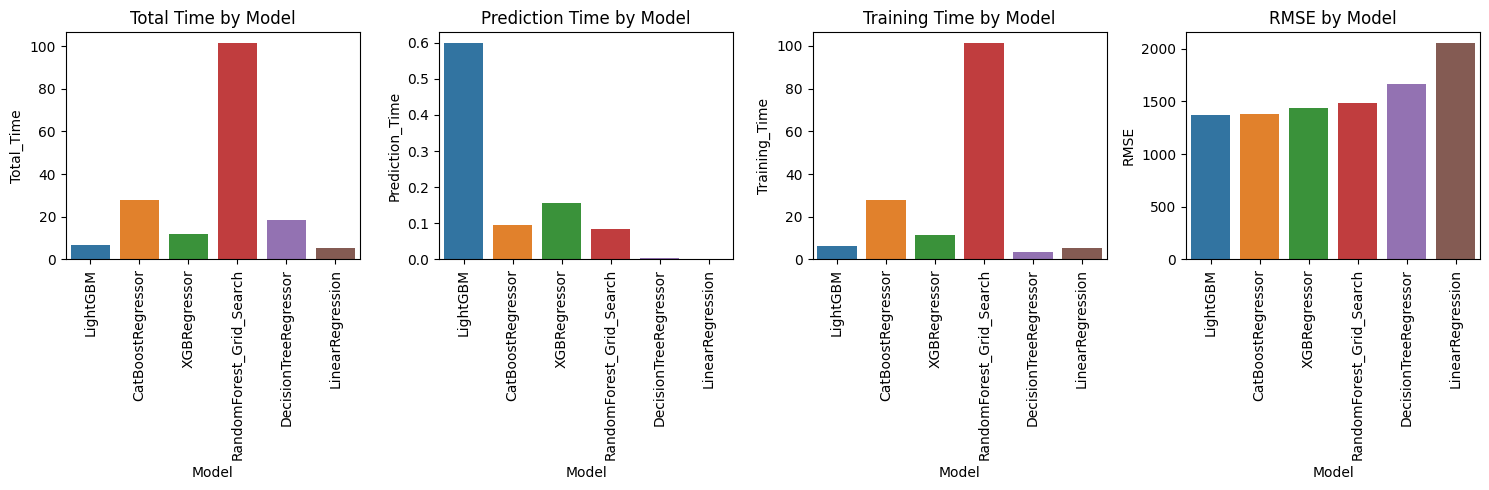

In [63]:
def get_barplot(df, colx, coly, title, ax, ascending=True):
    
    df_sorted = df.sort_values(by='RMSE', ascending=True)
        
    sns.barplot(ax=axes[ax], x=colx, y=coly, data=df_sorted)
    axes[ax].set_title(title)
    axes[ax].tick_params(axis='x', rotation=90)

if do_train_models == 'Y':
    print()
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    get_barplot(results_df, 'Model', 'Total_Time', 'Total Time by Model', 0)
    get_barplot(results_df, 'Model', 'Prediction_Time', 'Prediction Time by Model', 1)
    get_barplot(results_df, 'Model', 'Training_Time', 'Training Time by Model', 2)
    get_barplot(results_df, 'Model', 'RMSE', 'RMSE by Model', 3)
    plt.tight_layout()  # Prevents labels from being cut off
    plt.show()
else:
    print('Training skipped')


<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


    
- Consider tuning hyperparameters for at least one of the models except for Linear Regression. For this purpose, use `RandomizedSearchCV` or `GridSearchCV`. If you decide to use a loop, don't forget to change the way you split the data, because in this case we will need three subsets, not two. 
    
    
    
- After we train all models, it is recommended that we choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 




- When choosing the best model, we have to consider prediction time as well. The best model isn't always the one with the lowest error. Sometimes the errors are only slightly different, but the prediction time varies significantly. In such cases, it's worth considering a faster model. Think of a slow search engine that finds 10 useful links versus a fast one that finds 9. This is especially important if the model needs to operate in real time and produce results repeatedly. If a program runs just once, its speed might not even matter. But if it’s used continuously, optimization becomes crucial. So, in practice, apart from the other requirements, there are also runtime constraints for the model.

</div>

<div style="border: 5px solid blue; padding: 15px; margin: 5px">
Thank you, these suggestions have been implemented.
</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Great job! </div>

In [64]:
display(results_df)

,Model,Total_Time,Training_Time,Prediction_Time,RMSE
0,RandomForest_Grid_Search,101.339505,101.247726,0.085075,1483.483014
1,XGBRegressor,11.817353,11.652846,0.156924,1434.675114
2,LightGBM,7.010942,6.410447,0.598539,1374.221607
3,LinearRegression,5.196293,5.194189,0.001239,2051.227563
4,DecisionTreeRegressor,18.655833,3.306539,0.004781,1664.431424
5,CatBoostRegressor,27.823568,27.632751,0.095598,1383.246854


Summary:
- LightGBM is the most accurate model with the lowest RMSE score of 1374 with a prediction time of 0.51.
- A close second place for accuracy, CatBoostRegressor achieved an RMSE of 1383 with a prediction time of 0.09.
- Due to the significantly smaller prediction time and minor difference in accuracy, CatBoostRegressor has been selected as the most efffective model.
- Using a test set, CatBoostRegressor achieved an RMSE of 1370.
- All models achieved a lower RMSE than LinearRegression, proving their effectiveness.
- Boosting models showed a good combination of speed and accuracy.

In conclusion, several models were accurately trained. There may be some room for improvement by using other methods of filling missing values or removing additional outliers. It is suggested that processes are implemented to standardize data collection. 

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>


    
Great conclusion! This is a solid final summary with comparison across models. 
    
    
</div>    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Don't forget to update it if needed. 

</div>

<div style="border: 5px solid green; padding: 15px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
    
Excellent! </div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed